In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
from torchvision.transforms import ToTensor, Resize, Compose
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import numpy as np
import PIL 
import os
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
import seaborn as sb




# A) combination of Text and Image Network

## part 1 : Concatenation

This part combines Text and Image networks to improve the classification. all work is done in mergeImageTextNetwork. For this work, we concatenate the last feature layer in both. After that, we try to train an MLP to classify 3 classes with the output of two networks.

In [3]:
from mergeImageTextNetwork import mergeImageTextNetwork
mergeNet = mergeImageTextNetwork()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
mergeNet.faceDataset(root_dir='.', mode='train')
mergeNet.faceDataset(root_dir='.', mode='validation')
mergeNet.faceDataset(root_dir='.', mode='test')

In [6]:
mergeNet.train(epochs=30, lr=1e-3, modelPath_pred='checkpoints/textimageClassifier.pth')

 Epoch 1 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.15it/s]


 -Training Accuracy (Avg) = 38.4%, loss = 1.090282 



100%|██████████| 147/147 [00:09<00:00, 15.55it/s]


 - evaluation Accuracy = 42.9%, loss = 1.092354 

save model in checkpoints/textimageClassifier.pth
 Epoch 2 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.78it/s]


 -Training Accuracy (Avg) = 39.3%, loss = 1.087035 



100%|██████████| 147/147 [00:09<00:00, 15.47it/s]


 - evaluation Accuracy = 43.3%, loss = 1.091937 

save model in checkpoints/textimageClassifier.pth
 Epoch 3 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.64it/s]


 -Training Accuracy (Avg) = 39.6%, loss = 1.085862 



100%|██████████| 147/147 [00:09<00:00, 15.37it/s]


 - evaluation Accuracy = 43.2%, loss = 1.083914 

 Epoch 4 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.74it/s]


 -Training Accuracy (Avg) = 39.5%, loss = 1.082960 



100%|██████████| 147/147 [00:09<00:00, 15.45it/s]


 - evaluation Accuracy = 42.4%, loss = 1.080151 

 Epoch 5 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.19it/s]


 -Training Accuracy (Avg) = 44.0%, loss = 1.052160 



100%|██████████| 147/147 [00:09<00:00, 15.43it/s]


 - evaluation Accuracy = 54.3%, loss = 0.995801 

save model in checkpoints/textimageClassifier.pth
 Epoch 6 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.64it/s]


 -Training Accuracy (Avg) = 57.7%, loss = 0.920880 



100%|██████████| 147/147 [00:09<00:00, 15.33it/s]


 - evaluation Accuracy = 58.4%, loss = 0.920285 

save model in checkpoints/textimageClassifier.pth
 Epoch 7 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.57it/s]


 -Training Accuracy (Avg) = 59.3%, loss = 0.886460 



100%|██████████| 147/147 [00:09<00:00, 15.62it/s]


 - evaluation Accuracy = 57.9%, loss = 0.925785 

 Epoch 8 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.60it/s]


 -Training Accuracy (Avg) = 59.7%, loss = 0.880678 



100%|██████████| 147/147 [00:09<00:00, 15.56it/s]


 - evaluation Accuracy = 57.7%, loss = 0.924071 

 Epoch 9 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.61it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.878250 



100%|██████████| 147/147 [00:09<00:00, 15.43it/s]


 - evaluation Accuracy = 58.9%, loss = 0.910060 

save model in checkpoints/textimageClassifier.pth
 Epoch 10 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.62it/s]


 -Training Accuracy (Avg) = 60.0%, loss = 0.876379 



100%|██████████| 147/147 [00:09<00:00, 15.55it/s]


 - evaluation Accuracy = 59.5%, loss = 0.904431 

save model in checkpoints/textimageClassifier.pth
 Epoch 11 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.42it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.876255 



100%|██████████| 147/147 [00:09<00:00, 15.33it/s]


 - evaluation Accuracy = 59.6%, loss = 0.900992 

save model in checkpoints/textimageClassifier.pth
 Epoch 12 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.874429 



100%|██████████| 147/147 [00:09<00:00, 15.79it/s]


 - evaluation Accuracy = 58.5%, loss = 0.911661 

 Epoch 13 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.874143 



100%|██████████| 147/147 [00:09<00:00, 15.62it/s]


 - evaluation Accuracy = 58.5%, loss = 0.915889 

 Epoch 14 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.79it/s]


 -Training Accuracy (Avg) = 60.4%, loss = 0.873247 



100%|██████████| 147/147 [00:09<00:00, 15.37it/s]


 - evaluation Accuracy = 59.6%, loss = 0.903228 

 Epoch 15 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.873484 



100%|██████████| 147/147 [00:09<00:00, 15.67it/s]


 - evaluation Accuracy = 59.0%, loss = 0.909097 

 Epoch 16 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.70it/s]


 -Training Accuracy (Avg) = 60.3%, loss = 0.873121 



100%|██████████| 147/147 [00:09<00:00, 15.45it/s]


 - evaluation Accuracy = 59.1%, loss = 0.908026 

 Epoch 17 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.73it/s]


 -Training Accuracy (Avg) = 60.3%, loss = 0.873241 



100%|██████████| 147/147 [00:09<00:00, 15.65it/s]


 - evaluation Accuracy = 59.0%, loss = 0.909073 

 Epoch 18 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.80it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.873508 



100%|██████████| 147/147 [00:09<00:00, 15.79it/s]


 - evaluation Accuracy = 59.2%, loss = 0.908309 

 Epoch 19 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.64it/s]


 -Training Accuracy (Avg) = 60.3%, loss = 0.873050 



100%|██████████| 147/147 [00:09<00:00, 15.87it/s]


 - evaluation Accuracy = 58.8%, loss = 0.909740 

 Epoch 20 ----------------------------


100%|██████████| 571/571 [00:37<00:00, 15.32it/s]


 -Training Accuracy (Avg) = 60.0%, loss = 0.873718 



100%|██████████| 147/147 [00:09<00:00, 15.22it/s]


 - evaluation Accuracy = 59.4%, loss = 0.907191 

 Epoch 21 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874373 



100%|██████████| 147/147 [00:09<00:00, 15.53it/s]


 - evaluation Accuracy = 58.2%, loss = 0.914645 

 Epoch 22 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.66it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874407 



100%|██████████| 147/147 [00:09<00:00, 15.58it/s]


 - evaluation Accuracy = 59.1%, loss = 0.910624 

 Epoch 23 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.67it/s]


 -Training Accuracy (Avg) = 60.5%, loss = 0.874083 



100%|██████████| 147/147 [00:09<00:00, 15.64it/s]


 - evaluation Accuracy = 59.1%, loss = 0.912531 

 Epoch 24 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.61it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874710 



100%|██████████| 147/147 [00:09<00:00, 15.29it/s]


 - evaluation Accuracy = 59.1%, loss = 0.908679 

 Epoch 25 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.71it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.875067 



100%|██████████| 147/147 [00:09<00:00, 15.70it/s]


 - evaluation Accuracy = 58.3%, loss = 0.924203 

 Epoch 26 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.75it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.874903 



100%|██████████| 147/147 [00:09<00:00, 15.76it/s]


 - evaluation Accuracy = 59.2%, loss = 0.909131 

 Epoch 27 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.65it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.875366 



100%|██████████| 147/147 [00:09<00:00, 15.58it/s]


 - evaluation Accuracy = 59.5%, loss = 0.897737 

 Epoch 28 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.77it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.875553 



100%|██████████| 147/147 [00:09<00:00, 15.48it/s]


 - evaluation Accuracy = 57.2%, loss = 0.935151 

 Epoch 29 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.80it/s]


 -Training Accuracy (Avg) = 60.1%, loss = 0.875651 



100%|██████████| 147/147 [00:09<00:00, 15.68it/s]


 - evaluation Accuracy = 60.3%, loss = 0.894073 

save model in checkpoints/textimageClassifier.pth
 Epoch 30 ----------------------------


100%|██████████| 571/571 [00:36<00:00, 15.76it/s]


 -Training Accuracy (Avg) = 60.2%, loss = 0.874968 



100%|██████████| 147/147 [00:09<00:00, 15.46it/s]

 - evaluation Accuracy = 58.6%, loss = 0.907920 



In [7]:
# test model with test dataset
y_true, y_pred,_ = mergeNet.eval(test_flag=True)

100%|██████████| 147/147 [00:09<00:00, 15.34it/s]

 - evaluation Accuracy = 58.8%, loss = 0.909211 



In [8]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.44      0.54      0.48      1165
    negative       0.68      0.65      0.67      2032
    positive       0.62      0.54      0.58      1486

    accuracy                           0.59      4683
   macro avg       0.58      0.58      0.57      4683
weighted avg       0.60      0.59      0.59      4683



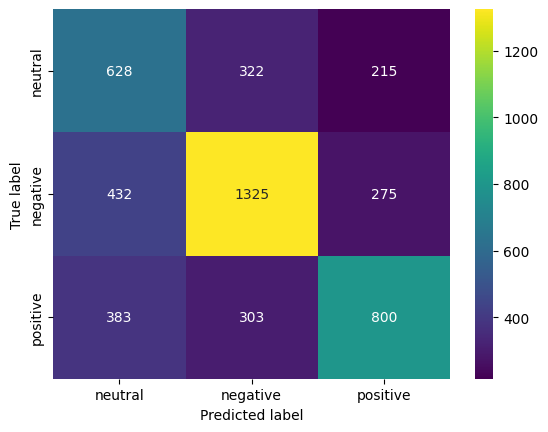

In [9]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

> **Best train Accuracy** = `60.1%`\
> **Best Validation Accuracy** = `60.3%`\
> **test Accuracy** = `59%`

> as you see can, accuracy increased by 3% in validation and it is not changed in test accuracy that is show improvement in the accuracy of the network with this approach.

## part 2: Transformer
#### `Notice:` **This part is in phase3_1_2.ipynb separately. you should run that notebook**

# B) Weakly Supervised Learning

`Weakly supervised learning` is a type of machine learning that uses incomplete or inexact labels to train a model. In weakly supervised learning, the labels are often generated by heuristics or based on noisy data, rather than being manually labeled. This type of learning is useful when labels are difficult or expensive to obtain

Weakly supervised learning typically relies on using a combination of techniques such as `weak classifiers`, `co-training`, and `generative models` to infer labels from the data: 
* `Weak classifiers` use a variety of features to classify data points without relying on labels.
* `Co-training` is a form of semi-supervised learning that uses two models to learn from each other and improve the accuracy of their predictions.
* `Generative models` use unlabeled data to generate labels that can then be used to train a model.

By combining these techniques, a model can learn from data that is difficult to label or has unreliable labels, allowing it to make better predictions.

to do this part, we have to use a similar dataset to MSTD. so we test two approach to do this part:
* **using validation dataset** : we didn' use validation dataset to train network so we can use it.
* **using new dataset** : we use `Flickr 8k` Dataset but the accuracy is lower than first approach

## 1) use validation as domain

In [2]:
from libs.MSCTDdataset import MSCTD
from torch.utils.data import Dataset, DataLoader
from libs.transforms import Compose,toTensor,resize
from torchvision.transforms import ToTensor, Resize
import torch
import torch.nn as nn
from torchvision.transforms import Compose
from torchvision.models import resnet50, ResNet50_Weights
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from libs.MSCTDdataset import MSCTD
from torch.utils.data import DataLoader
from libs.transforms import Compose,resize
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt

In [3]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

In [4]:
transforms = Compose([resize(dstsize=(224,224))])

root_dir = '.'

training_data = MSCTD(
        mode='train', 
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

valid_data = MSCTD(
        mode='validation',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

test_data = MSCTD(
        mode='test',
        transformer=transforms,
        download=False,
        root_dir=root_dir,
        read_mode="single")

In [5]:
batch_size = 64
train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

### BERT as Text Classifier

In [6]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased", use_fast=True)

In [7]:
import torch
# create dataset for text model
class MSDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

In [8]:
from transformers import AutoModel, AdamW
from torch import nn
# phase 2 text model (bert)
class TextClassifier(nn.Module):
  def __init__(self):
    super(TextClassifier, self).__init__()
    self.bert = AutoModel.from_pretrained('bert-base-uncased')
    self.fc1 = nn.Linear(768, 512)
    self.fc2 = nn.Linear(512, 64)
    self.fc3 = nn.Linear(64, 3)
    self.activation = nn.ReLU()
  
  def forward(self, input_ids, attention_mask):
    bert = self.bert(input_ids, attention_mask=attention_mask)[1]
    fc1 = self.fc1(bert)
    fc1 = self.activation(fc1)
    fc2 = self.fc2(fc1)
    fc2 = self.activation(fc2)
    fc3 = self.fc3(fc2)
    return fc3

In [9]:
pre_trained_path = 'checkpoints/bert.pth'
state_dict = torch.load(pre_trained_path, map_location=torch.device('cpu'))
text_model = TextClassifier()
text_model.load_state_dict(state_dict)
text_model.requires_grad_(False)
text_model.to(device)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


TextClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=Tru

### Image Classifier 

In [10]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.linear_relu_stack = nn.Sequential(

            nn.Linear(2048, 256),
            nn.ReLU(),
            nn.Dropout(0.5),

            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(64, 16),
            nn.ReLU(),
            nn.Dropout(0.5),
            
            nn.Linear(16, 3),
        )
        
    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [11]:
from faceAnalysis.networks.dan import DAN

pre_trained_path = 'checkpoints/faceDAN.pth'
pip_model = torch.load(pre_trained_path)
image_model = DAN(num_head=4, num_class=3,pretrained=False)
image_model.load_state_dict(pip_model['model_state_dict'])
image_model.requires_grad_(False)
image_model.to(device)

/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/user01/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


DAN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [12]:
# image_model = resnet50(weights=ResNet50_Weights.DEFAULT)
# image_model.fc = MLP()

# pre_trained_path = 'checkpoints/imageResNet50.pth'
# state_dict = torch.load(pre_trained_path, map_location=torch.device('cpu'))
# image_model.load_state_dict(state_dict)
# image_model.requires_grad_(False)
# image_model.to(device)

In [13]:
for param in image_model.parameters():
    param.requires_grad = False

for name, param in image_model.named_parameters():
     if 'fc' in name:
         param.requires_grad = True

# for name, param in image_model.named_parameters():
#     print(name, param.requires_grad)

In [14]:
learning_rate = 1e-4
epochs = 10
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(image_model.parameters(), lr=learning_rate)

In [15]:
from torch.utils.data import DataLoader
from tqdm import tqdm

def train_loop(dataloader, image_model, text_model ,loss_fn, optimizer,tokenizer, MSDataset):
    size = len(dataloader.dataset)
    image_model.train()
    text_model.eval()
    for i, (X, text, label, temp2) in enumerate(tqdm(dataloader)): 
        # Compute prediction and loss 
        X = torch.permute(X[0],(0,3,1,2)).float()#get image batch to train image model
        X = X.to(device)
        
        
        text = list(text[0])
        valid_encodings = tokenizer(text, truncation=True, padding=True, max_length=512)
        label = torch.squeeze(torch.Tensor(np.array(label).astype(int)).to(torch.long))
        label = label.tolist() # true labels just to pass them to MSdataset we don't use them
        
        valid_dataset = MSDataset(valid_encodings, label)
        valid_loader = DataLoader(valid_dataset, batch_size=64, shuffle=False) # text dataloader 
        for batch in valid_loader:

            input_ids = batch['input_ids'].to(device)  # text model inputs
            attention_mask = batch['attention_mask'].to(device)
            outputs = text_model(input_ids, attention_mask=attention_mask)
            outputs = outputs.to(device) # text model output (psuedo labels)
            
        
        pred,_,_ = image_model(X)      
        y = outputs.argmax(1) 
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  
    print(f"loss: {loss.item():>7f}")


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0
    model.eval()
    with torch.no_grad():
        for (X, temp1, y, temp2) in dataloader:
            X = torch.permute(X[0],(0,3,1,2)).float()
            X = X.to(device)
            y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long)) ###
            y = y.to(device)
            pred,_,_ = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= size
    correct /= size
    print(f"\nTest Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [16]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(valid_dataloader, image_model, text_model, loss_fn, optimizer, tokenizer, MSDataset)
    test_loop(test_dataloader, image_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------


100%|██████████| 80/80 [00:31<00:00,  2.57it/s]


loss: 1.135341

Test Accuracy: 40.6%, Avg loss: 0.017306 

Epoch 2
-------------------------------


100%|██████████| 80/80 [00:30<00:00,  2.65it/s]


loss: 1.081173

Test Accuracy: 41.5%, Avg loss: 0.017259 

Epoch 3
-------------------------------


100%|██████████| 80/80 [00:30<00:00,  2.63it/s]


loss: 1.004611

Test Accuracy: 41.5%, Avg loss: 0.017289 

Epoch 4
-------------------------------


100%|██████████| 80/80 [00:30<00:00,  2.61it/s]


loss: 1.079783

Test Accuracy: 42.0%, Avg loss: 0.017248 

Epoch 5
-------------------------------


100%|██████████| 80/80 [00:30<00:00,  2.63it/s]


loss: 1.091247

Test Accuracy: 41.9%, Avg loss: 0.017253 

Epoch 6
-------------------------------


100%|██████████| 80/80 [00:32<00:00,  2.50it/s]


loss: 1.064847

Test Accuracy: 42.1%, Avg loss: 0.017248 

Epoch 7
-------------------------------


100%|██████████| 80/80 [00:31<00:00,  2.52it/s]


loss: 1.115422

Test Accuracy: 42.1%, Avg loss: 0.017246 

Epoch 8
-------------------------------


100%|██████████| 80/80 [00:30<00:00,  2.59it/s]


loss: 1.145843

Test Accuracy: 42.4%, Avg loss: 0.017256 

Epoch 9
-------------------------------


100%|██████████| 80/80 [00:32<00:00,  2.46it/s]


loss: 1.025892

Test Accuracy: 42.4%, Avg loss: 0.017237 

Epoch 10
-------------------------------


100%|██████████| 80/80 [00:30<00:00,  2.60it/s]


loss: 1.082800

Test Accuracy: 42.3%, Avg loss: 0.017239 

Done!


In [20]:
# test image model on MSCTD test data after training on validation dataset (unlabeled)
y_pred = []
y_true = []
image_model.eval()
with torch.no_grad():
    for (X, temp1, y, temp2)  in test_dataloader:
        X = torch.permute(X[0],(0,3,1,2)).float()
        X = X.to(device)
        y = torch.squeeze(torch.Tensor(np.array(y).astype(int)).to(torch.long))
        y = y.to(device)
        pred,_,_ = image_model(X)
        output = pred.argmax(1).cpu().numpy()
        y_pred.extend(output)
        label = y.cpu().numpy()
        y_true.extend(label)

In [21]:
print(classification_report(y_true=y_true, y_pred=y_pred, target_names=['neutral','negative','positive']))

              precision    recall  f1-score   support

     neutral       0.32      0.05      0.09      1298
    negative       0.43      0.96      0.59      2163
    positive       0.20      0.00      0.00      1606

    accuracy                           0.42      5067
   macro avg       0.32      0.34      0.23      5067
weighted avg       0.33      0.42      0.28      5067



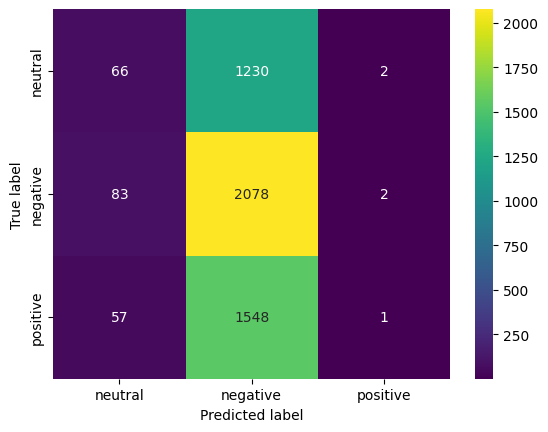

In [22]:
cf_matrix = confusion_matrix(y_true=y_true, y_pred=y_pred)

sb.heatmap(cf_matrix,
           annot=True,
           fmt='d',
           cmap='viridis',
           xticklabels=['neutral','negative','positive'],
           yticklabels=['neutral','negative','positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [24]:
torch.save(image_model.state_dict(), 'checkpoints/weakly_validation.pth')

> We use validation images and caption without labels. first preprocess captions and produce psuedo labels(text model's outputs) then use these labels to train image model. after training image model, test image model on MSCTD test data. as you can we get better accuracy. because the model train on another dataset which
> * `Notice`: we did not use validation dataset  in phase 0, phase 1, phase2.image model did not see validation dataset until now.

## 2) **Optional**: use Flickr 8k as domain
### `Notice`: **This part is in phase3_Part2_flickr.ipynb separately. you should run that notebook**